## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

# google teachable machine :it actually provides you various easy way to train your model of image classification and to solve image classfication problem,if you see the code of it. It actually uses the model like resnet,linet,,,...etc (for more information search on goggle).we can use teachable machine for image project(i.e image classification) ,audio project and pose project..etc  

#By seeing the architecture of model of image classification which we have to solve in teachable machine we can build our own model .so its very helpfull


In [4]:
#In image net competition vgg16 has perform really will.it was used in imagenet classficiation competition.it has lot of advantages.in this we can resuse the weight from some different model.it has more thsn 138 million learnable parameter
#by default in vgg16 there are 1000 class meaans we are going to get 1000 output in output layer .this vgg16 is genrally used for soving multi class classifiaction problem  .BUt here below which we are going to solve problem statement we just have two classes like dog  and cat  
#we have to do the homework of linet and alexnet 

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [4]:
!Nvidia-smi

'Nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
tf.test.gpu_device_name()

''

In [6]:
tf.__version__

'2.3.1'

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten  #dense layer is ued for creatring hideen and fully connected layer,#flatten is used to flatening the input layer or can say creating 1-d array 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16  #this is the way of importing vgg16 class we can check this on keras application by clicking on vgg16  
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image  #importing the image library to work with image  
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img  #ImageDataGenerator library is used for reading the image and data Augmentation 
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#load_img :used for loading a single image
#glob library is used for finding insdie a folder how many number of folders are present

In [8]:
#we do scaling for test data but we dont do data augmentation for test data .For training data we do both data augmentation and scaling
#Data Augmentation is a technique in Deep Learning which helps in adding value to our base dataset by adding the gathered information from various sources to improve the quality of data of an organisation.
#Data Augmentation is one of the most important processes that makes the data very much informational.

In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Toyaz Pandey/Downloads/PetImages/train'  #train_path,valid_path  these are the variables which we defining here
valid_path = 'C:/Users/Toyaz Pandey/Downloads/PetImages/test'


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)   #these are the predined parameters which is present in keras appliaction of  vgg16
# here by using above code all the weight of vgg16 network from keras apllication of imagenet competition will get downloaded
#input size is represnting the image size and +3 is 3 channel of rgb image
#weights =imagenet :are the weights of imagenet classification .In that competiton(imagenet classification) whatever the weights were actually stored in this particulaar neuraal netowrk(vgg16) we are going to retrieve ans use that so for doing this we are writing weights = imagenet
#include_top=False: this will make sure that in our vgg16 network from flatten layer to oupput layer and input layer parts will be skipped means they wont be considered in our network aand then we can add our own fllatten llayer and output layer(means according to our own probllem statement of dog and cat classification)) and input layer 
#here in vgg16 we have skipped its input layer even by using include_top=False and we have added our own input layer by using input_shape


In [11]:
#vgg16=VGG16()
# here by using above code all the weight and other data(fllaten and output layer and all)  of vgg16 network from keras apllication of imagenet competition will get downloaded


In [12]:
vgg16.summary()   #here in output we wont have any flaten and output layer beacuse of these parameter include_top=False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# don't train existing weights
for layer in vgg16.layers:  #vgg16.layers : this means all the above layers which we got in output
    layer.trainable = False  #this means we are freezing the architecture #so we are not training all above layers actually bacause the weight present in all these above layers are already trained

In [14]:
  # useful for getting number of output classes
folders = glob('C:/Users/Toyaz Pandey/Downloads/PetImages/*')
#glob: this will find out the number of folders present in petimages folder
folders

['C:/Users/Toyaz Pandey/Downloads/PetImages\\test',
 'C:/Users/Toyaz Pandey/Downloads/PetImages\\train']

In [15]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)  #(vgg16.output): these layers output we have above recieved and we are flattening it  

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)  # dense will create the  output layer and len is for length of the folder which is here 2 dog and cat 
#you can add more dense layer if you want
#prediction is a varaiabe which we have above made
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [17]:

# view the structure of the model
model.summary()
# here in output will get that much number of  parameter only trained which are present in output and flatten layer,because rest layers weight were already trained  so in all those layer just forward propoagtion and backward propoagtion will  happen with same weights will happen and we have setted their training = false in above codes     


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',   #with softmax activation we generaly use lose function as categorical_crossentropy
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,  # here we are doing the data augmentation by using parameter of rescaling ,shaer_range.zoom_range,horizontal_flip....etc
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #for test we generally do the rescale we dont do the  data  augmentation 

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Toyaz Pandey/Downloads/PetImages/train', #these will read your dtata from trainning dataset of PetImages folder
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory('C:/Users/Toyaz Pandey/Downloads/PetImages/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')  # if we are using sigmoid activation fcunction then our classs model should be binary

Found 14 images belonging to 2 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(    # when we are using keras api then we have to use .fit_generator mehtod to fit the model
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.9872 - accuracy: 0.4737 - val_loss: 3.2356 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 2.9847 - accuracy: 0.5263 - val_loss: 2.3337 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 1.9340 - accuracy: 0.5263 - val_loss: 0.7210 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.3700 - accuracy: 1.0000 - val_loss: 1.4038 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.0413 - accuracy: 0.4737 - val_loss: 1.5385 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.8521 - accuracy: 0.4737 - val_loss: 0.9296 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.5686 - accuracy: 0.6842 - val_l

In [23]:
##### for working with vgg19 just write vgg19 where we have used a vgg16 thats it...############

In [24]:
# so i am getting here very good accuracy  here(total 100 percent  ) so i will avoid using cnn from scratch.

#by using same conecept we can do dhoni vs kohli classification or any other which we want(for more problem statement check in google)


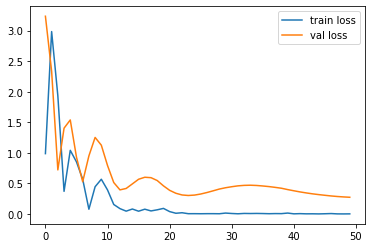

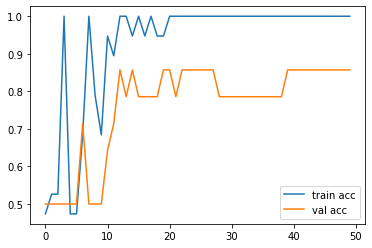

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[0.70295674, 0.29704323],
       [0.01520617, 0.98479384],
       [0.0037286 , 0.9962714 ],
       [0.9962543 , 0.00374571],
       [0.95614654, 0.04385355],
       [0.9845367 , 0.01546334],
       [0.01432042, 0.98567957],
       [0.02075997, 0.97924006],
       [0.2109911 , 0.78900886],
       [0.00513839, 0.99486154],
       [0.15983784, 0.8401621 ],
       [0.6551745 , 0.34482548],
       [0.98652774, 0.01347222],
       [0.81935537, 0.18064466]], dtype=float32)

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image as img

In [56]:
#model=load_model('model_resnet50.h5')

In [61]:
#img_data

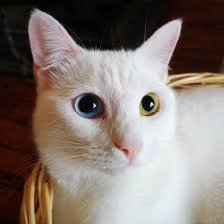

In [70]:
img=image.load_img('C:/Users/Toyaz Pandey/Downloads/PetImages/test/cats/download (4).jpg',target_size=(224,224))  #this is for doing prediciton of specific image from cat ot dog folder 

img

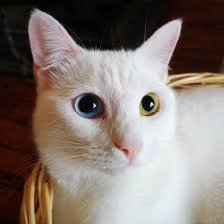

In [71]:
img

In [72]:
#x=image.img_to_array(img)   #converting image in to array
#x

In [69]:
#x.shape

In [73]:
test_image = image.img_to_array(x)    # converting the image in to array
test_image = test_image/255  #normalizing the data
test_image = np.expand_dims(test_image,axis = 0)  # after normalizing the datataset we need to expaand the dimension
result = model.predict(test_image)

In [74]:
result  #by using  this we can actually classify that image is cat or dog  by:
# in output if we get greater than 0.5 then it means it is dog and if it is less than 0.5  then it is a cat as in folder our first folder is cat and second folder is dog   
#in output we are getting two probabilities beacuse we have used softmax activation function.if we could have used sigmoid acivation then we would have got only one probabilites in output.
# as in output [0.9845366]  we got this so probabiltiy  is greater for cat because our first folder is of cats

array([[0.9845366 , 0.01546339]], dtype=float32)

In [75]:
#x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
#img_data.shape

In [77]:
model.predict(test_image)

array([[0.9845366 , 0.01546339]], dtype=float32)

In [78]:
a=np.argmax(model.predict(test_image), axis=1)  #this is for classifying as image is dog or cat  

In [79]:
a

array([0], dtype=int64)

In [82]:
if a==0:
    print('the image classified is cat')
else:
    print('the image classified is dog')

the image classified is cat


In [1]:
### AS like we have done for vgg16 we can do for all other tarnsfer learning model just by clicking on model from keras apllication and finding out the waay to how to import them   and we even have  to change number of output categories in everry model even    

#  google teachable machine :it actually provides you various easy way to train your model of image classification and to solve image classfication problem,if you see the code of it. It  actually uses the model like resnet,linet,,,...etc (for more information search on goggle)
# By seeing the architecture of model of image classification which we have to solve in teachable machine we can build our own model .so  its very helpfull

In [ ]:
#we have to practice for linet,resnet50,resnet101,inceptionv3,densenet121, and alexnet with different dataset like cotton disease 